In [2]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

import re
import nltk
from nltk.util import pr
from nltk.corpus import stopwords
import string 

from wordcloud import WordCloud

In [ ]:
# pd.set_option('display.max_colwidth', None)
#pd.reset_option('display.max_colwidth')

In [3]:
#download stopwords
#nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english") #to reduce word to its stem > Lemmatization???
stopword = set(stopwords.words("english")) #to elimiate unimportand words, allowing applications to focus on the important word

# Data class
- Hate
- Non-Hate

# Dataset

## DV

- enhancmenet = select only those row which has all agreement

In [6]:
df = pd.read_csv("Dataset/DV/labeled_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   label               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [7]:
df.head()

,id,count,hate_speech,offensive_language,neither,label,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [8]:
df['label'].value_counts()

label
1    19190
2     4163
0     1430
Name: count, dtype: int64

Extract tweet and the label column

label column
- hate speech 0 = Hate
- offensive language 1 = Non-Hate
- neither 2 = Non-Hate

In [9]:
df['class'] = df['label'].map({0:"Hate", 1:"Non-Hate", 2:"Non-Hate"})
cleaned_df = df[['class','tweet']].rename(columns={'tweet':'text'})
cleaned_df.to_csv("Dataset/DV/cleaned_data.csv", index=False)

Plot

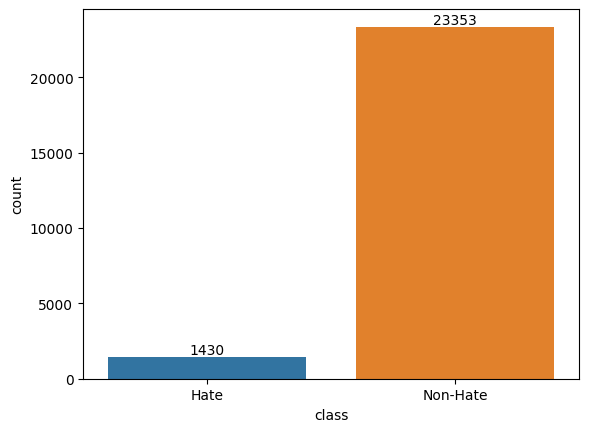

In [10]:
p = sb.countplot(x='class', data=cleaned_df, order=["Hate", "Non-Hate"])
p.bar_label(p.containers[0])
plt.show()

## GabHateCorpus

In [31]:
filepath = "Dataset/GabHateCorpus/"
df = pd.read_csv(filepath+"GHC_all.tsv", sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27546 entries, 0 to 27545
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    27546 non-null  object
 1   hd      27546 non-null  int64 
 2   cv      27546 non-null  int64 
 3   vo      27546 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 860.9+ KB


In [32]:
df.head()

,text,hd,cv,vo
0,He most likely converted to islam due to his n...,0,0,0
1,So Ford lied about being a psychologist. Recor...,0,0,0
2,Jobs. Education. Ending abuse of Nation. CA43.,0,0,0
3,"I share a lot of your values, & like many who ...",0,0,0
4,I am so ready to get back to blogging! www.ben...,0,0,0


In [34]:
df['hd'].value_counts()

hd
0    25198
1     2348
Name: count, dtype: int64

In [42]:
df['hate'] = df['hd'] | df['cv'] | df['vo']
df['class'] = df['hate'].map({0:"Non-Hate", 1:"Hate"})
df_needed = df[['class', 'text', 'hate']].copy()
df_needed.head(5)

In [41]:
df['hate'].value_counts()

hate
0    24169
1     3377
Name: count, dtype: int64

In [50]:
df_needed.to_csv(filepath+"data_needed.csv", index=False)

## SE2019-task-5


In [6]:
filepath = "Dataset/SE2019/"
df = pd.read_csv(filepath+"hateval2019_en_train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      9000 non-null   int64 
 1   text    9000 non-null   object
 2   HS      9000 non-null   int64 
 3   TR      9000 non-null   int64 
 4   AG      9000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 351.7+ KB


In [7]:
df.head()

,id,text,HS,TR,AG
0,201,"Hurray, saving us $$$ in so many ways @potus @...",1,0,0
1,202,Why would young fighting age men be the vast m...,1,0,0
2,203,@KamalaHarris Illegals Dump their Kids at the ...,1,0,0
3,204,NY Times: 'Nearly All White' States Pose 'an A...,0,0,0
4,205,Orban in Brussels: European leaders are ignori...,0,0,0


In [8]:
df['HS'].value_counts()

HS
0    5217
1    3783
Name: count, dtype: int64

Extract text and HS column and save to csv file

HS column
- 0 = Non-Hate
- 1 = Hate

In [9]:
df['class'] = df['HS'].map({0:"Non-Hate", 1:"Hate"})
df['hate'] = df['class'].apply(lambda x: 1 if x =='Hate' else 0)

df_needed = df[['class', 'text', 'hate']].copy()
df_needed.head(5)

,class,text,hate
0,Hate,"Hurray, saving us $$$ in so many ways @potus @...",1
1,Hate,Why would young fighting age men be the vast m...,1
2,Hate,@KamalaHarris Illegals Dump their Kids at the ...,1
3,Non-Hate,NY Times: 'Nearly All White' States Pose 'an A...,0
4,Non-Hate,Orban in Brussels: European leaders are ignori...,0


In [73]:
df_needed.to_csv(filepath+"data_needed.csv", index=False)

Plot

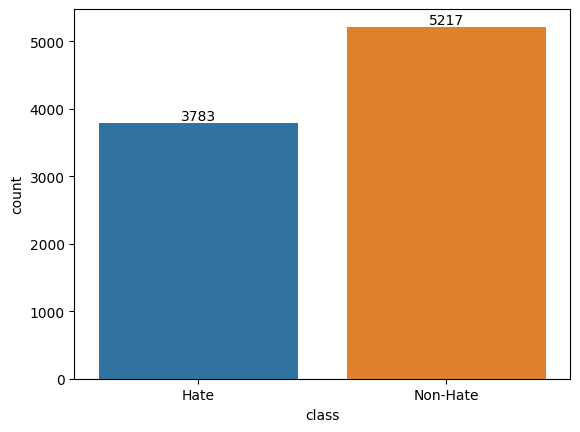

In [10]:
p = sb.countplot(x='class', data=df_needed, order=["Hate", "Non-Hate"])
p.bar_label(p.containers[0])
plt.show()

## Twitter-SA

## implicit-hate-corpus


# Text preprocessing

In [51]:
import emoji

Initial data cleaning requirements that we can think of after looking at the top 5 records:

- The Twitter handles are already masked as @user due to privacy concerns. So, these Twitter handles are hardly giving any information about the nature of the tweet.
We can also think of getting rid of the punctuations, numbers and even special characters since they wouldn’t help in differentiating different kinds of tweets.
Most of the smaller words do not add much value. For example, ‘pdx’, ‘his’, ‘all’. So, we will try to remove them as well from our data.
Once we have executed the above three steps, we can split every tweet into individual words or tokens which is an essential step in any NLP task.
In the 4th tweet, there is a word ‘love’. We might also have terms like loves, loving, lovable, etc. in the rest of the data. These terms are often used in the same context. If we can reduce them to their root word, which is ‘love’, then we can reduce the total number of unique words in our data without losing a significant amount of information
- Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word. For example, For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”

- todo: talk about before and after cleaning words count 
- all data obtained had to be stripped of all non text content including emoji, html and extra whitespace. ensure only content analyzing the text of the posts and not falesly identify certain emoji or html as hate speech

In [79]:
def clean(text):
    text = str(text).lower()
    text = emoji.replace_emoji(text) # remove emoji
    text = re.sub('@[\w]*', '', text) #remove tweeter handler
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text) #replace URL
    text = re.sub('<.*?>+', '', text)
    text = re.sub("[^a-zA-Z# ]", "", text) #remove punctuation, number, special character,keep hash
    text = re.sub('\n', '', text) #remove line break
    text = re.sub('\w*\d\w*', '', text) # not sure
    text = re.sub(r'\s+', ' ', text) #remove multiple spaces
    text = [word for word in text.split(' ') if word not in stopword]
    #text = [stemmer.stem(word) for word in text]
    text = " ".join(text)
    return text

def stem(text):
    text = text.split()
    text = [stemmer.stem(word) for word in text]
    text = " ".join(text)
    return text

In [61]:
df = pd.read_csv(filepath+"data_needed.csv")
df.head()

,class,text,hate
0,Non-Hate,He most likely converted to islam due to his n...,0
1,Non-Hate,So Ford lied about being a psychologist. Recor...,0
2,Non-Hate,Jobs. Education. Ending abuse of Nation. CA43.,0
3,Non-Hate,"I share a lot of your values, & like many who ...",0
4,Non-Hate,I am so ready to get back to blogging! www.ben...,0


In [62]:
# clean
df['text'] = df['text'].apply(clean)
df.head(6)

,class,text,hate
0,Non-Hate,likely converted islam due nature suitable isl...,0
1,Non-Hate,ford lied psychologist records seem indicate s...,0
2,Non-Hate,jobs education ending abuse nation ca,0
3,Non-Hate,share lot values like many dont call alt right...,0
4,Non-Hate,ready get back blogging #recipes #foodphotography,0
5,Non-Hate,taking look new opportunity called fx prog opp...,0


In [65]:
df[df['text'] == " "], df[df['text'] == ""]

(Empty DataFrame
 Columns: [class, text, hate]
 Index: [],
 Empty DataFrame
 Columns: [class, text, hate]
 Index: [])

In [64]:
print(df['class'].value_counts())
df = df[df['text'] != ""]
df = df[df['text'] != " "]
print(df['class'].value_counts())

class
Non-Hate    24169
Hate         3377
Name: count, dtype: int64
class
Non-Hate    23769
Hate         3344
Name: count, dtype: int64


In [58]:
# save to csv
filename = "data_processed.csv"
df.to_csv(filepath+filename, index=False)

In [81]:
# clean and stem
df['text'] = df['text'].apply(stem)
df.head(5)

,class,text,hate
0,Non-Hate,like convert islam due natur suitabl islam doc...,0
1,Non-Hate,ford lie psychologist record seem indic studen...,0
2,Non-Hate,job educ end abus nation ca,0
3,Non-Hate,share lot valu like mani dont call alt right i...,0
4,Non-Hate,readi get back blog #recip #foodphotographi,0


In [82]:
# save to csv
filename = "data_stemmed.csv"
df.to_csv(filepath+filename, index=False)

# visualization

In [83]:
df = pd.read_csv(filepath+"data_processed.csv")
# df = pd.read_csv("Dataset/SE2019/preocessed_data.csv")

In [84]:
df.head()

,class,text,hate
0,Non-Hate,likely converted islam due nature suitable isl...,0
1,Non-Hate,ford lied psychologist records seem indicate s...,0
2,Non-Hate,jobs education ending abuse nation ca,0
3,Non-Hate,share lot values like many dont call alt right...,0
4,Non-Hate,ready get back blogging #recipes #foodphotography,0


Common word

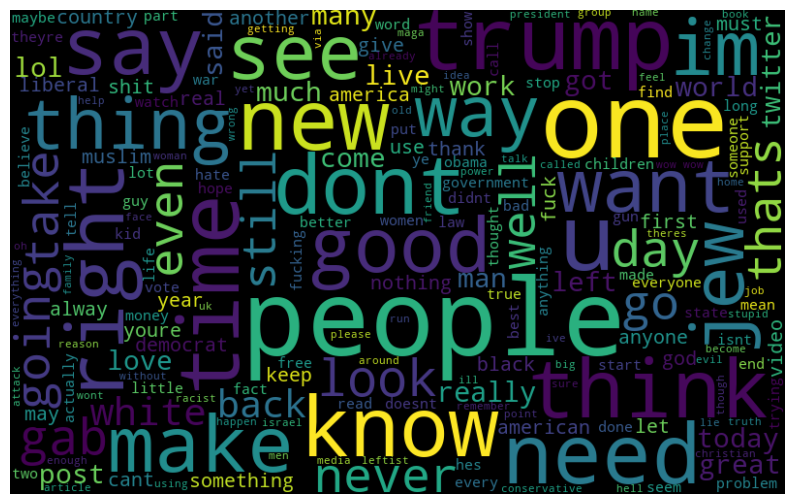

In [85]:
all_words = ' '.join([text for text in df['text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Common word in non hate

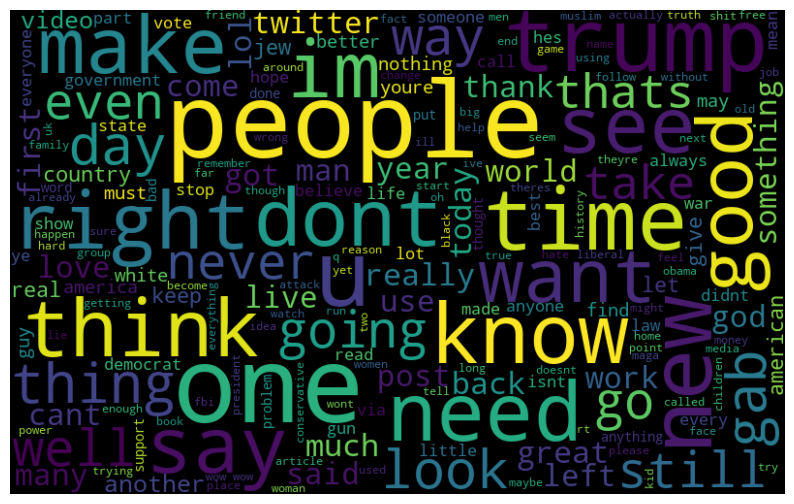

In [86]:
words =' '.join([text for text in df['text'][df['hate'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Common word in hate

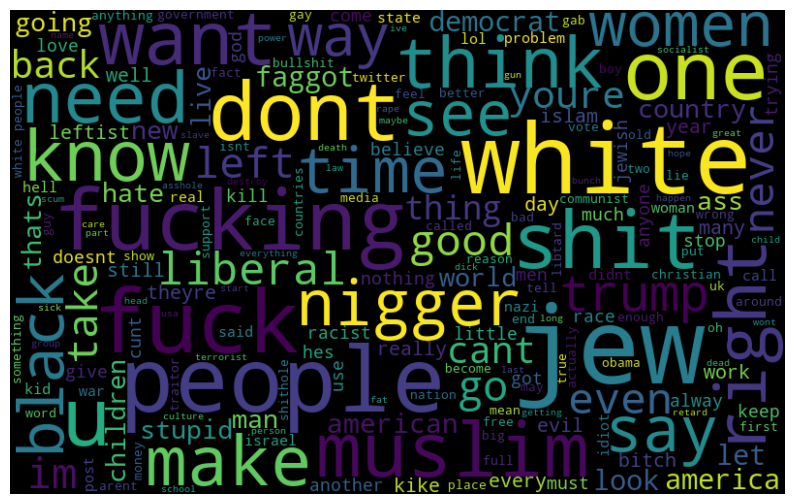

In [87]:
words =' '.join([text for text in df['text'][df['hate'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## understanding hashtag

In [ ]:
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

# use havent processed data so word not edited 
ht_nonhate = hashtag_extract(df['text'][df["hate"]==0])
ht_hate = hashtag_extract(df['text'][df['hate']==1])

In [ ]:
# 2d to 1d array
ht_nonhate = sum(ht_nonhate, [])
ht_hate = sum(ht_hate, [])


barchart for common word for hashtag
- As expected, most of the terms are negative with a few neutral terms as well. So, it’s not a bad idea to keep these hashtags in our data as they contain useful information. Next, we will try to extract features from the tokenized tweets.

In [ ]:
a = nltk.FreqDist(ht_nonhate)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sb.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()


In [ ]:
a = nltk.FreqDist(ht_hate)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sb.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()


# Handle imbalance data